<a href="https://colab.research.google.com/github/ldockx/my-first-data-engineering-project/blob/add-forecasting/first_data_engineering_effort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import requests
import pandas as pd
from datetime import datetime

# --- 1. Setup ---
API_KEY = "c726ffef4bc80d66ba1b86881e30dea3"  # get a free one at https://openweathermap.org/api
CITY = "Brussels"
URL = f"http://api.openweathermap.org/data/2.5/weather?q={CITY}&appid={API_KEY}&units=metric"

# --- 2. Extract ---
response = requests.get(URL)
data = response.json()

#print(data)

# --- 3. Transform ---
# Flatten useful fields into a dict
weather_dict = {
    "city": data["name"],
    "temperature_C": data["main"]["temp"],
    "feels_like_C": data["main"]["feels_like"],
    "humidity_%": data["main"]["humidity"],
    "weather": data["weather"][0]["description"],
    "wind_speed_mps": data["wind"]["speed"],
    "timestamp": datetime.utcfromtimestamp(data["dt"])
}

# Convert to DataFrame for analysis
df = pd.DataFrame([weather_dict])

# --- 4. Load (for now, just display) ---
print(df)

# Optionally save to CSV
#df.to_csv("weather_data.csv", index=False)


       city  temperature_C  feels_like_C  humidity_%    weather  \
0  Brussels           8.57          5.96          86  clear sky   

   wind_speed_mps           timestamp  
0            4.63 2025-10-02 05:23:18  


/tmp/ipython-input-980344605.py:25: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  "timestamp": datetime.utcfromtimestamp(data["dt"])


In [4]:
#forecast

import requests
import pandas as pd
from datetime import datetime

# --- Setup ---
API_KEY = "c726ffef4bc80d66ba1b86881e30dea3"   # Get free key from openweathermap.org
CITY = "Brussels"
URL = f"http://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units=metric"

# --- Extract ---
response = requests.get(URL)
data = response.json()

# --- Transform ---
# Flatten forecast list into a table
forecast_list = []
for item in data["list"]:
    forecast_list.append({
        "city": data["city"]["name"],
        "datetime": datetime.utcfromtimestamp(item["dt"]),
        "temperature_C": item["main"]["temp"],
        "feels_like_C": item["main"]["feels_like"],
        "humidity_%": item["main"]["humidity"],
        "weather": item["weather"][0]["description"],
        "wind_speed_mps": item["wind"]["speed"]
    })

df = pd.DataFrame(forecast_list)

# --- Load ---
print(df.head())

# Save to CSV (acts as the "Load" step of ETL)
df.to_csv("weather_forecast.csv", index=False)


       city            datetime  temperature_C  feels_like_C  humidity_%  \
0  Brussels 2025-10-02 06:00:00           8.62          7.11          86   
1  Brussels 2025-10-02 09:00:00           8.87          6.73          77   
2  Brussels 2025-10-02 12:00:00          12.81         11.66          58   
3  Brussels 2025-10-02 15:00:00          16.96         15.76          40   
4  Brussels 2025-10-02 18:00:00          13.82         12.62          52   

            weather  wind_speed_mps  
0         clear sky            2.61  
1  scattered clouds            3.76  
2     broken clouds            3.42  
3   overcast clouds            3.22  
4   overcast clouds            3.28  


/tmp/ipython-input-2995090335.py:22: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  "datetime": datetime.utcfromtimestamp(item["dt"]),


Text(0, 0.5, 'Forecasted Temperature')

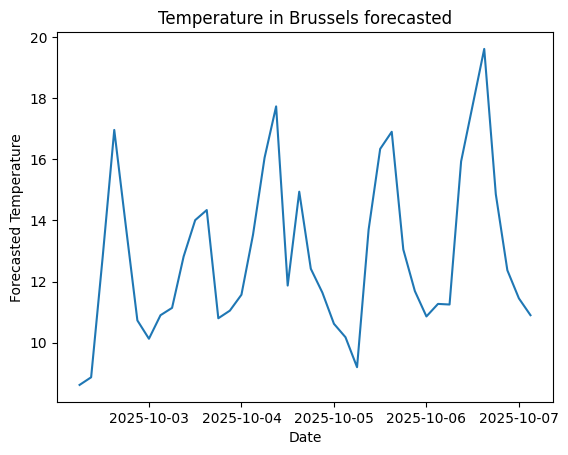

In [6]:
import matplotlib.pyplot as plt

x = df["datetime"]
y = df["temperature_C"]
plt.plot(x,y)
plt.title("Temperature in Brussels forecasted")
plt.xlabel("Date")
plt.ylabel("Forecasted Temperature")